In [1]:
import os
import glob

import numpy as np

import monai
from monai.transforms import LoadImage

import itk
from itk import TubeTK as tube

import site
site.addsitedir("../ARGUS")

from ARGUS_IO import *
from ARGUS_ptx_ar_train import ARGUS_ptx_ar_train
from ARGUS_ptx_roi_inference import ARGUS_ptx_roi_inference

In [2]:
image_files = sorted(glob.glob("./Data_PTX/images/*.mha"))
label_files = sorted(glob.glob("./Data_PTX/labels/*.mha"))

new_image_files = [os.path.basename(x) for x in image_files]
new_label_files = [os.path.basename(x) for x in label_files]

In [3]:
ar_nnet = ARGUS_ptx_ar_train("../ARGUS/ARGUS_ptx_ar.cfg", "vfold", device_num=0)
ar_nnet.load_model(0, "./Results_Best/ptx_vfold_run0/best_model_9.pth")

roi_nnet = ARGUS_ptx_roi_inference("../ARGUS/ARGUS_ptx_roi.cfg", "vfold", device_num=0)

In [4]:
for file_num in [0]: #range(len(image_files)):
    img = itk.imread(image_files[file_num])
    lbl = itk.imread(label_files[file_num])
    ar_nnet.preprocess(img, slice_num=-16, crop_data=False, scale_data=False, rotate_data=True)
    roi = ar_nnet.input_tensor
    print(roi.shape)

(1, 1, 12, 320, 320)


In [5]:
res = ar_nnet.inference()

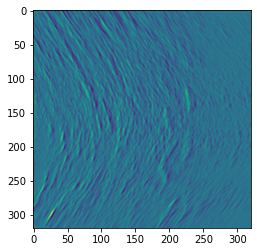

In [24]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

plt.imshow(roi[0,0,11])

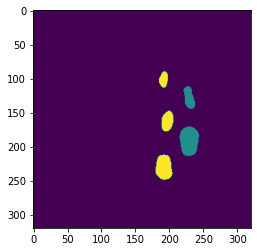

In [7]:
plt.imshow(res)

In [9]:
croproi = roi_nnet.generate_roi(roi[0,0], res)

112 213
98 226


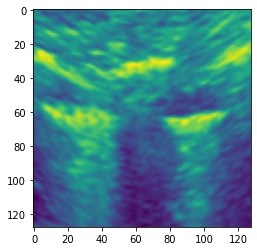

In [25]:
plt.imshow(rotate(croproi[0,0,0],270))